In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder

In [5]:
df=pd.read_csv('mushroom.csv')

In [7]:
df

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,863,sunken,scaly,brown,yes,foul,attached,crowded,narrow,chocolate,...,partial,orange,one,flaring,purple,abundant,leaves,poisonous,5.877891,17.464145
1996,1160,sunken,scaly,purple,yes,musty,attached,distant,narrow,red,...,partial,white,one,zone,yellow,numerous,waste,poisonous,6.500840,13.501957
1997,265,convex,grooves,green,yes,fishy,notched,close,narrow,pink,...,partial,brown,two,evanescent,yellow,abundant,woods,poisonous,13.558064,11.270020
1998,411,bell,smooth,white,no,pungent,free,close,narrow,orange,...,universal,yellow,one,cobwebby,brown,solitary,woods,poisonous,11.092703,8.423199


## Exploratory Data Analysis (EDA)

In [9]:
print("Dataset Overview:")
print(df.head())
print("\nDataset Information:")
df.info()
print("\nMissing Values:")
print(df.isnull().sum())
print("\nClass Distribution:")
print(df['class'].value_counts())


Dataset Overview:
   Unnamed: 0 cap_shape cap_surface cap_color bruises   odor gill_attachment  \
0        1167    sunken       scaly     white      no  anise      descending   
1        1037    sunken     fibrous       red      no  anise         notched   
2         309      flat     grooves    purple     yes   foul      descending   
3         282      bell       scaly      pink     yes  fishy         notched   
4         820      flat      smooth    yellow     yes  musty            free   

  gill_spacing gill_size gill_color  ...  veil_type veil_color ring_number  \
0      distant     broad       pink  ...    partial      brown         two   
1      crowded    narrow  chocolate  ...  universal      brown         two   
2      crowded     broad     purple  ...  universal     yellow         two   
3        close     broad     orange  ...    partial     yellow         two   
4      crowded    narrow     orange  ...  universal      white        none   

   ring_type spore_print_color p

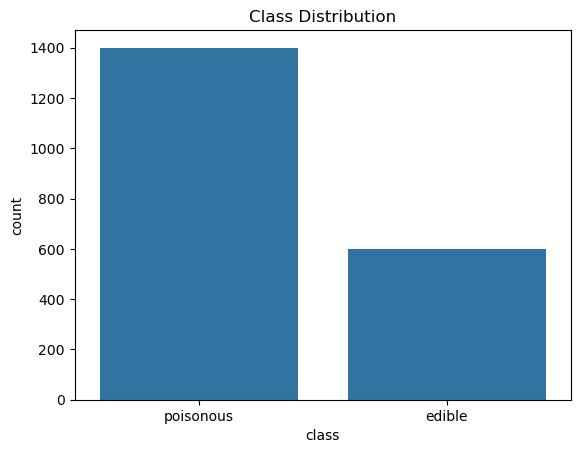

In [12]:
# Visualizations
sns.countplot(x='class', data=df)
plt.title('Class Distribution')
plt.show()


## Data Preprocessing

In [15]:
# Encoding categorical variables
label_encoders = {}
for column in df.columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le


In [17]:
# Splitting the dataset
X = df.drop('class', axis=1)
y = df['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


# Data Visualization

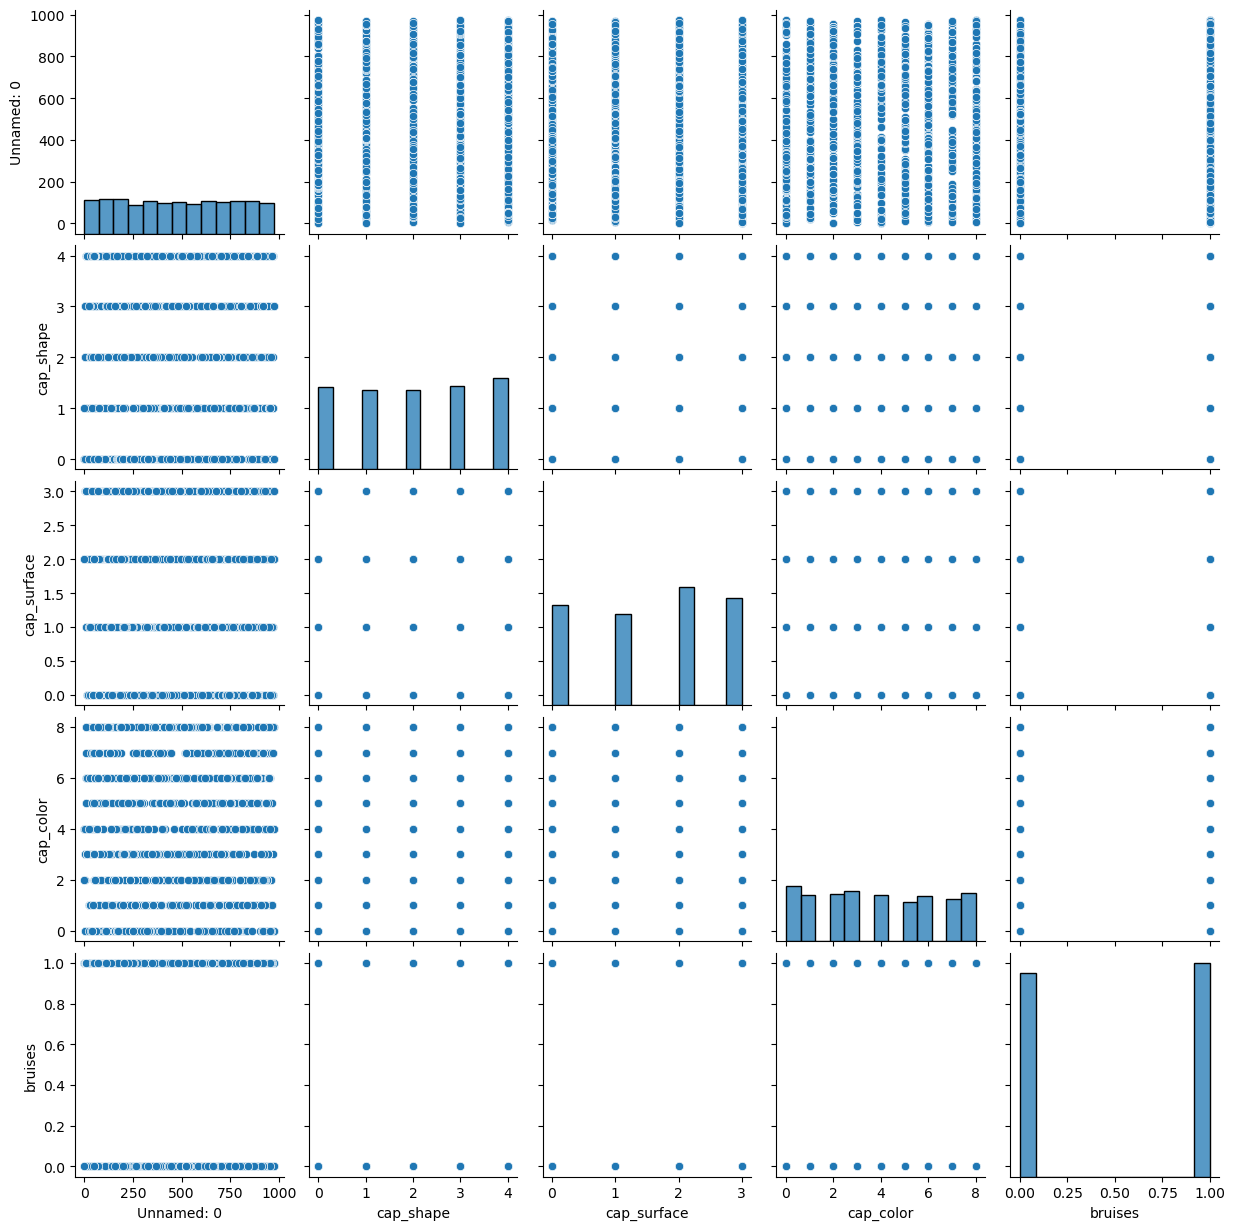

In [20]:
sns.pairplot(df.iloc[:, :5], diag_kind='hist')  # Pair plot for a subset of features
plt.show()


## SVM Implementation

In [23]:
# Basic SVM Classifier
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [24]:
# Predictions
y_pred = svm_model.predict(X_test)


In [25]:
# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7
Precision: 0.7
Recall: 1.0
F1 Score: 0.8235294117647058

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       180
           1       0.70      1.00      0.82       420

    accuracy                           0.70       600
   macro avg       0.35      0.50      0.41       600
weighted avg       0.49      0.70      0.58       600



C:\Users\Sonam Sherkar\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Sonam Sherkar\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Sonam Sherkar\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Visualization of SVM Results

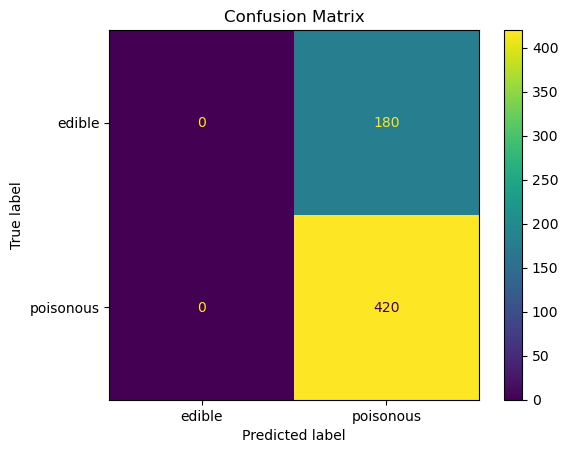

In [30]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=label_encoders['class'].classes_)
plt.title('Confusion Matrix')
plt.show()


## Parameter Tuning and Optimization

In [33]:
# Experiment with different kernels
kernels = ['linear', 'poly', 'rbf']
results = []
for kernel in kernels:
    model = SVC(kernel=kernel, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results.append({
        'Kernel': kernel,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred)
    })


In [35]:
# Display results
results_df = pd.DataFrame(results)
print(results_df)


   Kernel  Accuracy  Precision  Recall  F1 Score
0  linear       0.7        0.7     1.0  0.823529
1    poly       0.7        0.7     1.0  0.823529
2     rbf       0.7        0.7     1.0  0.823529


## Comparison and Analysis

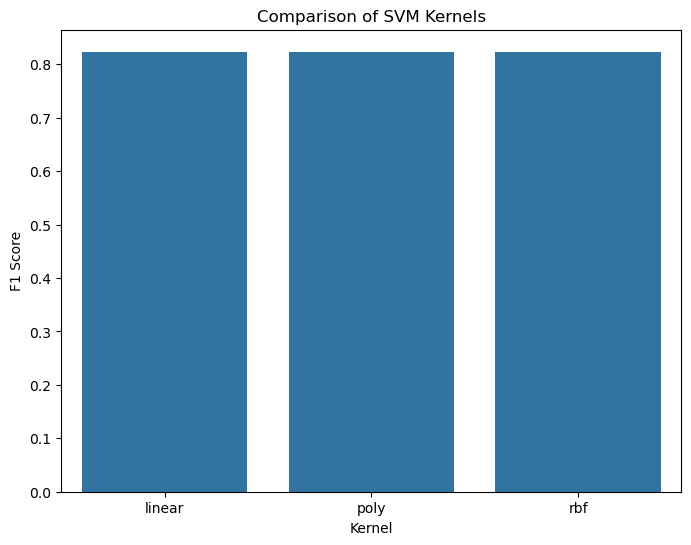

In [38]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Kernel', y='F1 Score', data=results_df)
plt.title('Comparison of SVM Kernels')
plt.show()


In [40]:
## Analyze SVM strengths and weaknesses for the Mushroom dataset based on EDA and visualization results.
## Strengths of SVM for the Mushroom Dataset:
# Effective for High-Dimensional Data: The Mushroom dataset contains many categorical features that are effectively handled after encoding.
# Robust Classification: SVM performs well in separating the classes (e.g., edible vs. poisonous) due to its ability to find an optimal hyperplane.
# Flexibility with Kernels: The kernel trick enables SVM to model complex decision boundaries, which can be beneficial for categorical data relationships.

## Weaknesses of SVM for the Mushroom Dataset:
# Scalability: Training SVMs can be computationally expensive for large datasets, which might be a challenge for real-time applications.
# Sensitivity to Feature Scaling: The dataset requires preprocessing (e.g., scaling) for better performance, especially for non-linear kernels.
# Imbalanced Class Handling: Although the dataset is relatively balanced, SVM may struggle with datasets where one class dominates.


In [ ]:
## Discuss practical implications of SVM in real-world classification tasks.
# High Accuracy: SVM excels in binary and multi-class classification with well-separated classes, making it ideal for medical diagnosis, fraud detection, and text classification tasks.
# Robust to Overfitting: With proper regularization, SVM can handle noisy data effectively, ensuring reliable predictions.
# Kernel Flexibility: The ability to use different kernels allows SVM to model both linear and non-linear decision boundaries, making it versatile across diverse domains.
# Scalability Limitation: SVM struggles with very large datasets due to high computational costs, which can limit its application in real-time or big data scenarios.
# Feature Engineering Needs: SVM relies on well-preprocessed and scaled features, requiring additional effort in data preparation for optimal performance.